# Bank Client Deposit Data set Classification

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Import Libraries

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [ ]:
df=pd.read_csv('/content/Bank Client Deposit Data set Classification.csv')

In [ ]:
#to check whether that data is balanced or imbalanced
#count the number of instances of each class label
count=df['y'].value_counts()
#calculating the percentage of instances for each class label
percentage=count/df.shape[0]*100
#printing the class label counts and percentages
print("Class label counts: \n",count)
print("Class label percentages: \n",percentage)
#determining if the data is balanced or imbalanced
if (percentage[0] < 60 and percentage[1] < 60) or (percentage[0] > 40 and percentage[1] > 40):
    print("The data is balanced")
else:
    print("The data is imbalanced")

Class label counts: 
 no     39922
yes     5289
Name: y, dtype: int64
Class label percentages: 
 no     88.30152
yes    11.69848
Name: y, dtype: float64
The data is imbalanced


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,4552,188,11,other,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,3.885559,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,67.985794,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,7661.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df.shape

(45211, 17)

In [ ]:
# number of missing values in the dataframe
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Checking for unique values in categorical features

In [ ]:
# Categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Print unique values for each categorical feature
for feature in categorical_features:
    print(f"Unique values for {feature}: {df[feature].unique()}")

Unique values for job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values for marital: ['married' 'single' 'divorced']
Unique values for education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values for default: ['no' 'yes']
Unique values for housing: ['yes' 'no']
Unique values for loan: ['no' 'yes']
Unique values for contact: ['unknown' 'cellular' 'telephone']
Unique values for month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values for poutcome: ['unknown' 'failure' 'other' 'success']
Unique values for y: ['no' 'yes']


# Visualization

<Axes: >

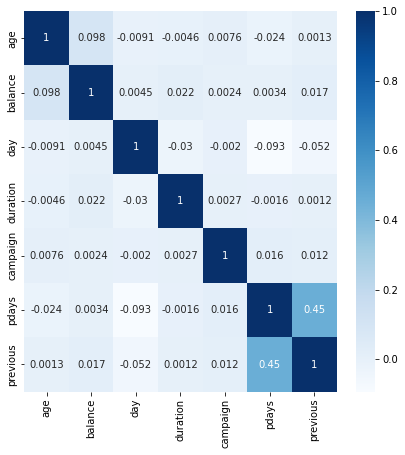

In [ ]:
# 2D Correlation heatmap matrix
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Checking for outliers

Column 'age' has 487 outliers


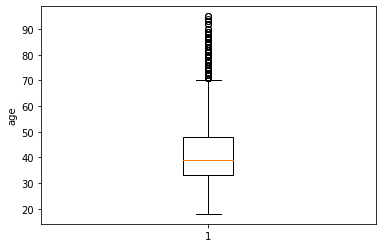

Column 'balance' has 4729 outliers


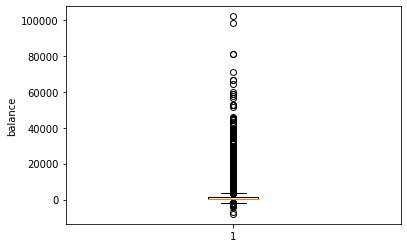

Column 'day' has 0 outliers


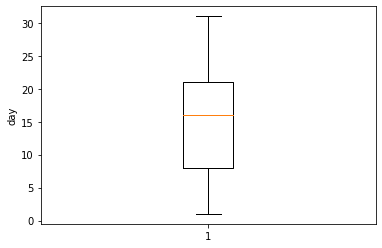

Column 'duration' has 3235 outliers


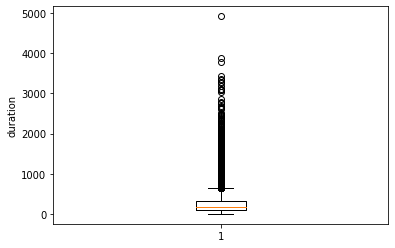

Column 'campaign' has 3084 outliers


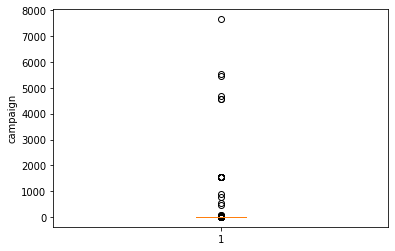

Column 'pdays' has 8257 outliers


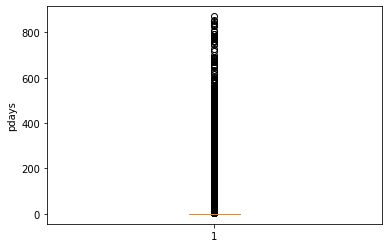

Column 'previous' has 8257 outliers


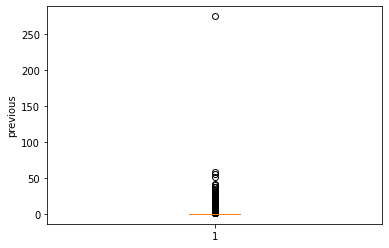

In [ ]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Loop through each numerical column in the DataFrame
for col in df_numeric.columns:
    # Calculate the quartiles and interquartile range
    q1, q2, q3 = np.percentile(df[col], [25, 50, 75])
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out the outliers and count them
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    # Create the boxplot
    fig, ax = plt.subplots()
    ax.boxplot(df[col])

    # Set the y-axis label
    ax.set_ylabel(col)

    # Display the count of outliers
    print(f"Column '{col}' has {num_outliers} outliers")

    # Show the plot
    plt.show()

# Removing Outliers

In [ ]:
# Loop through each numerical column in the DataFrame
for col in df_numeric.columns:
    # Calculate the quartiles and interquartile range
    q1, q2, q3 = np.percentile(df[col], [25, 50, 75])
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove the outliers from the DataFrame
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Show the new DataFrame without outliers
print(df)

# Check for outliers again
for col in df_numeric.columns:
    q1, q2, q3 = np.percentile(df[col], [25, 50, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}' has {len(outliers)} outliers.")

       age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no     2143     yes   no   
1       44    technician   single  secondary      no       29     yes   no   
2       33  entrepreneur  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45198   37    management  married   tertiary      no     1428      no   no   
45202   34        admin.   single  secondary      no      557      no   no   
45203   23       student   single   tertiary      no      113      no   no   
45205   25    technician   single  secondary      no      505      no  yes   
45209   57   blue-collar  married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previou

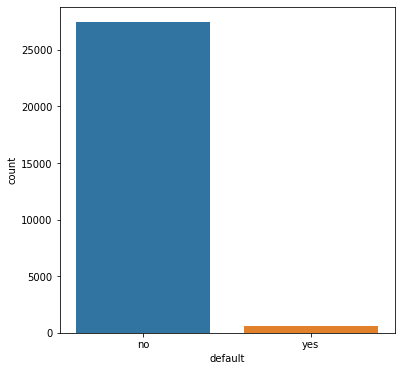

In [ ]:
# to show count of values in target column using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='default',data=df)
plt.show()

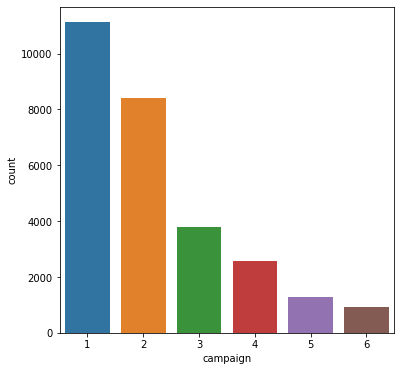

In [ ]:
# to show count of values in target column using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='campaign',data=df)
plt.show()

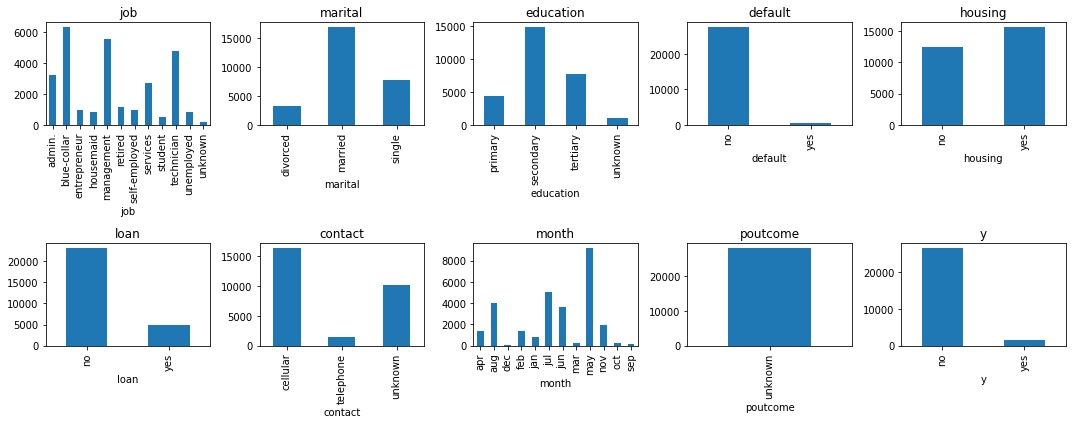

In [ ]:
# Select the categorical and numerical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Generate a cross-tabulation table for the categorical features
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for i, feature in enumerate(categorical_features):
    ct = pd.crosstab(index=df[feature], columns='count')
    ax = axs[i // 5, i % 5]
    ct.plot(kind='bar', legend=None, ax=ax)  # set the color of the bars to blue
    ax.set_title(feature)
plt.tight_layout()
plt.show()

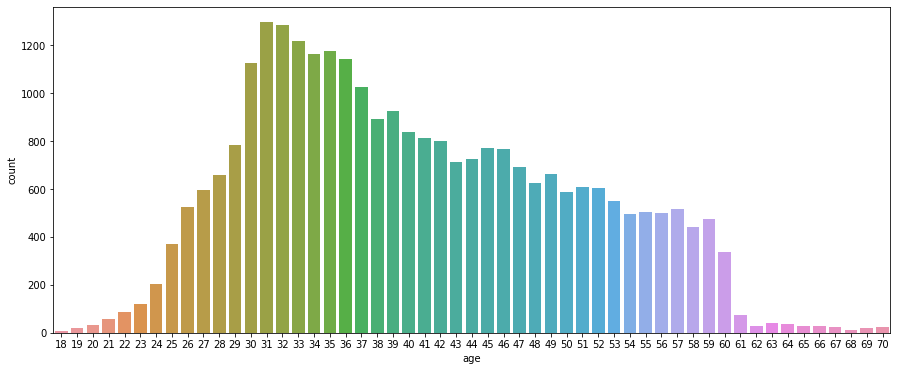

In [ ]:
# to show count of values in target column using countplot
plt.figure(figsize=(15,6))
sns.countplot(x='age',data=df)
plt.show()

<Axes: title={'center': 'last contact duration'}, ylabel='Frequency'>

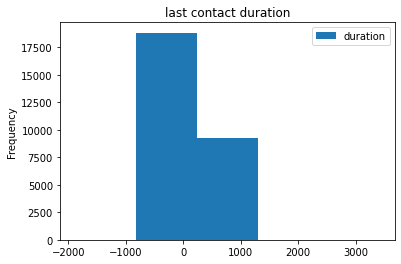

In [ ]:
# create histogram with title
df.plot( column='duration', kind = 'hist', title = 'last contact duration', bins=5)

In [ ]:
# Define categorical columns
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Convert categorical features to type 'category'
df[categorical_features] = df[categorical_features].astype('category')

# Map categorical values to numerical values
df[categorical_features] = df[categorical_features].apply(lambda x: x.cat.codes)

print(df)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45198   37    4        1          2        0     1428        0     0        0   
45202   34    0        2          1        0      557        0     0        0   
45203   23    8        2          2        0      113        0     0        0   
45205   25    9        2          1        0      505        0     1        0   
45209   57    1        1          1        0      668        0     0        1   

       day  month  duration

# Seperating Independent and dependent variable

In [ ]:
# Select the independent variables
X = df.iloc[:, :-1]  # all columns except the last one

# Select the dependent variable
y = df.iloc[:, -1]   # last column only

In [ ]:
X=np.array(X) # converting X into numpy array
y=np.array(y) # converting y into numpy array

In [ ]:
# convert the array to integers using the "unsafe" casting rule
X = X.astype('int64', casting='unsafe')
y = y.astype('int64', casting='unsafe')

In [ ]:
print(X)

[[58  4  1 ... -1  0  0]
 [44  9  2 ... -1  0  0]
 [33  2  1 ... -1  0  0]
 ...
 [23  8  2 ... -1  0  0]
 [25  9  2 ... -1  0  0]
 [57  1  1 ... -1  0  0]]


In [ ]:
print(y)

[0 0 0 ... 1 1 0]


# Chaid Implementation

In [ ]:
class Node: # defines a new class called Node.
# defines the constructor method for the class.    
    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature # assigns the value of the feature to the feature attribute of the instance being created
        self.threshold = threshold # assigns the value of the threshold to the threshold attribute of the instance being created
        self.chi2 = chi2 # assigns the value of the chi2 parameter to the chi2 attribute of the instance being created
        self.left = left # assigns the value of the left parameter to the left attribute of the instance being created
        self.right = right # assigns the value of the right parameter to the right attribute of the instance being created
        self.value = value # assigns the value of the value parameter to the value attribute of the instance being created

In [ ]:
class DecisionTree: # class definition for a decision tree
# This is the constructor for the DecisionTree class    
    def __init__(self, alpha=0.05, min_samples=3,max_depth=3):
        self.alpha = alpha # assigns the value of alpha to the alpha attribute of the instance being created
        self.min_samples = min_samples # assigns the value of min_samples to the min_samples attribute of the instance being created
        self.max_depth = max_depth # assigns the value of max_depth to the max_depth attribute of the instance being created
        self.tree = None # nitializes the tree attribute to None.
    
    def fit(self, X, y): # trains the decision tree on the input data X and target labels y
        self.tree = self._build_tree(X, y) # It calls the _build_tree method to construct the decision tree
    
    def predict(self, X): # makes predictions for new data X using the decision tree.takes in a matrix X of new input features
        y_pred = np.zeros(X.shape[0]) #initializes an empty numpy array y_pred of shape (X.shape[0],) to store the predicted values.
        for i, x in enumerate(X): # for loop that iterates over each sample in the input data X
            node = self.tree #  sets the node variable to the root node of the decision tree.
            while node.feature is not None: # loops the decision tree from the root node until a leaf node is reached 
                if x[node.feature] <= node.threshold: # checks if feature value at node for current x sample is <= threshold value
                    node = node.left # If it is, the algorithm moves to the left child node of the current node.
                else:
                    node = node.right # If it is not, the algorithm moves to the right child node of the current node.
            y_pred[i] = node.value # assigns the predicted class value to the y_pred variable for the current sample index i
        return y_pred
    
    def _build_tree(self, X, y): #recursively builds by splitting the data at each node which maximizes the chi2 test statistic.
        if X.shape[0] <= self.min_samples: #checks if the no.of samples in the input feature matrix is <= to the min no.of samples specified by the min_samples parameter
            return Node(value=self._get_leaf_value(y)) #creates a new Node object with the value attribute set to the most frequent class label
        
        # to determine the best feature to split on, the threshold for that feature, and the chi2 score for the split.
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y)) # the tree is a leaf and a new node with the leaf value is returned
        
        left_mask = X[:, best_feature] <= best_threshold #  creates a Boolean mask left_mask
        right_mask = ~left_mask # Boolean mask right_mask that selects the rows of X that are not selected by left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask]) # recursively builds the left subtree of the decision tree 
        right_tree = self._build_tree(X[right_mask], y[right_mask]) # recursively builds the right subtree of the decision tree 
        
        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
 
 # This initializes the variables best_feature, best_threshold, and best_chi2 to None, None, and 0,  
    def _get_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_chi2 = 0
        
        for feature in range(X.shape[1]): # loop iterates over each feature in the input X
            sorted_X = np.sort(X[:, feature]) # For current feature, it sorts the values in the column of X in ascending order.
            thresholds = (sorted_X[1:] + sorted_X[:-1]) / 2 #thresholds are computed by adding each pair of adjacent sorted values and / the sum by 2.
            for threshold in thresholds: # loop iterates over each threshold in the list of thresholds.
                left_mask = X[:, feature] <= threshold #selects the rows of X where the feature is <= to the threshold,
                right_mask = ~left_mask # selects the rows of X that are not selected by left_mask
                
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue 
                
                chi2 = self._get_chi2(y, left_mask, right_mask) # get chi2 value for left mask and right mask
                
                if chi2 > best_chi2: # check if chi2 is > for best chi2
                    best_chi2 = chi2 #  store chi2 for best chi2
                    best_feature = feature # store feature value to best feature depending on the chi2 value 
                    best_threshold = threshold # store best threshold value to the variable threshold depending on chi2 value
        
        if best_feature is not None: #  check if best feature is not none
            return best_feature, best_threshold, best_chi2 # display best feature,best feature, best chi2
        else:
            return None, None, None # if it does not satisfy display none
    
    def _get_chi2(self, y, left_mask, right_mask): # calculate chi2 for left mask and right mask
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)], #array calculates the no.of samples with class 0 and class 1 
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)] # define observed array values for  left mask and right mask
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)] # define expected array values
        ]) / y.shape[0] 
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2
    
    def _get_leaf_value(self, y): # is used to calculate the output value of a leaf node of the decision tree
        return np.bincount(y).argmax()# to count the occurrences of each class in the target variable y
    # class with the highest count is returned as the predicted output value for the leaf node.
    

# Train Test split

In [ ]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state) # checks whether the random_state parameter is specified
    shuffle_indices = np.random.permutation(len(X)) # shuffles the indices randomly,returns a new array with the shuffled indices.
    test_size = int(test_size * len(X)) #  calculates the number of indices to use for testing based on the test_size parameter 
    test_indices = shuffle_indices[:test_size] # split the shuffled indices into two subsets: one for testing
    train_indices = shuffle_indices[test_size:] # and one for training
    X_train = X[train_indices] # training, testing subsets by selecting the appropriate indices from the original X and y arrays.
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(22451, 16)

In [ ]:
X_test.shape

(5612, 16)

In [ ]:
y_train.shape

(22451,)

In [ ]:
y_test.shape

(5612,)

In [ ]:
classifier= DecisionTree()

In [ ]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Fit the model

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred_train = classifier.predict(X_train)

In [ ]:
y_pred_train

array([1., 0., 0., ..., 0., 0., 0.])

# Training accuracy

In [ ]:
correct_predictions = 0 #  keep track of the number of correct predictions made by the model
total_predictions = len(y_train)

for i in range(total_predictions):
    if y_pred_train[i] == y_train[i]:
        correct_predictions += 1 # predicted value is equal to the actual value, this line increments the variable by 1.

accuracy = correct_predictions / total_predictions
print("Training accuracy: ", accuracy)

Training accuracy:  0.9781301501046724


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

# Test accuracy

In [ ]:
correct_predictions = 0
total_predictions = len(y_test)

for i in range(total_predictions):
    if y_pred[i] == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print("Testing accuracy: ", accuracy)

Testing accuracy:  0.9333570919458304


# Evaluation Metrics

In [ ]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore) 

[[ 113  142]
 [ 232 5125]]
Accuracy 0.9333570919458304
Recall: 0.32753623188405795
Precision: 0.44313725490196076
F-score: 0.37666666666666665
